<a href="https://colab.research.google.com/github/pedroblossbraga/image_classification_test/blob/main/Noventiq_assignment_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive') #, force_remount=True)

# path = 'drive/MyDrive'
# os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_path = 'drive/MyDrive/noventiq test CV'
os.listdir(root_path)

['test_assignment_cv']

In [ ]:
path = os.path.join(root_path, 'test_assignment_cv')
os.listdir(path)

['non_georges.csv', 'georges.csv', 'george_test_task.zip']

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

from PIL import Image
import requests

# Dataset

In [ ]:
df_nongeorges = pd.read_csv(os.path.join(path, 'non_georges.csv'),
                            header=None)
df_nongeorges

,0
0,https://i.pinimg.com/736x/fd/65/bb/fd65bb679b7...
1,https://i.pinimg.com/736x/78/63/a2/7863a2404af...
2,https://i.pinimg.com/736x/bc/3a/f4/bc3af41444c...
3,https://i.pinimg.com/736x/46/a3/59/46a3595eec7...
4,https://i.pinimg.com/736x/54/b2/ef/54b2ef7af71...
...,...
3361,https://i.pinimg.com/736x/77/67/53/776753c14ee...
3362,https://i.pinimg.com/736x/e5/d0/f4/e5d0f428313...
3363,https://i.pinimg.com/736x/ba/d6/2b/bad62bc6efa...
3364,https://i.pinimg.com/736x/e6/74/ad/e674adb02ce...


In [ ]:
df_georges = pd.read_csv(os.path.join(path, 'georges.csv'),
                            header=None)
df_georges

,0
0,https://i.pinimg.com/736x/17/0d/5b/170d5b93d80...
1,https://i.pinimg.com/736x/47/b9/9a/47b99a2ddcd...
2,https://i.pinimg.com/736x/90/e8/90/90e890f054b...
3,https://i.pinimg.com/736x/0a/71/6f/0a716f6f14e...
4,https://i.pinimg.com/736x/f1/95/be/f195bea0b78...
...,...
2676,https://i.pinimg.com/736x/ec/55/2f/ec552fa0c0a...
2677,https://i.pinimg.com/736x/a7/e2/e1/a7e2e10b8d6...
2678,https://i.pinimg.com/736x/e0/d5/c5/e0d5c5eeac0...
2679,https://i.pinimg.com/736x/77/4d/89/774d897ee7e...


In [ ]:
qtd_georges = len(df_georges[df_georges.columns[0]].unique())
qtd_nongeorges = len(df_nongeorges[df_nongeorges.columns[0]].unique())

print(
    '\nThere are {} ({:.3f}%) distinct images with St. George.\n'.format(
        qtd_georges,
      qtd_georges * 100 / (qtd_georges + qtd_nongeorges)
    ),
    '\nThere are {} ({:.3f}%) distinct images without St. George.\n'.format(
        qtd_nongeorges,
        qtd_nongeorges * 100 / (qtd_georges + qtd_nongeorges)
    )
)


There are 2360 (41.404%) distinct images with St. George.
 
There are 3340 (58.596%) distinct images without St. George.



We have a couple of thousand of images of both classes, in a relatively balanced dataset.

In case the quantity of images is not sufficient, we can apply data augmentation, by applying simple transformations to images, such as flipping, rotating  or zooming the image.

In [ ]:
def read_img_from_url(url):
  return Image.open(requests.get(url, stream=True).raw)

def plot_img_from_url(url):
  img = read_img_from_url(url)
  plt.imshow(img)
  plt.show()

plot_img_from_url(df_nongeorges[df_nongeorges.columns[0]].values[0])

In [ ]:
np.random.seed(42) # set a pseudo-random seed

# example with and without st.georges

plt.figure(figsize=(5,4))

# images with st.georges
plt.subplot(2,2,1)
plt.title('With St. Georges', fontsize = 12)
img = read_img_from_url(
    df_georges[df_georges.columns[0]].values[np.random.randint(0, qtd_georges)]
)
plt.imshow(img)
plt.subplot(2,2,3)
plt.title('With St. Georges', fontsize = 12)
img = read_img_from_url(
    df_georges[df_georges.columns[0]].values[np.random.randint(0, qtd_georges)]
)
plt.imshow(img)

# images without st.georges
plt.subplot(2,2,2)
plt.title('Without St. Georges', fontsize = 12)
img = read_img_from_url(
    df_nongeorges[df_nongeorges.columns[0]].values[np.random.randint(0, qtd_nongeorges)]
)
plt.imshow(img)
plt.subplot(2,2,4)
plt.title('Without St. Georges', fontsize = 12)
img = read_img_from_url(
    df_nongeorges[df_nongeorges.columns[0]].values[np.random.randint(0, qtd_nongeorges)]
)
plt.imshow(img)

plt.tight_layout()
plt.show()

# Creating traning and validation samples

In [ ]:
# creating a folder to store the images
def create_folder(dir_name,
                  root_dir):
  new_path = os.path.join(root_dir, dir_name)

  if dir_name not in os.listdir(root_dir):
    os.mkdir(new_path)

create_folder(dir_name = 'image_dataset',
                  root_dir = root_path)
os.listdir(root_path)

['test_assignment_cv', 'image_dataset']

In [ ]:
classes = ['not st george', 'st george']
for class_name in classes:
  create_folder(dir_name = class_name,
                root_dir = os.path.join(root_path, 'image_dataset'))

os.listdir(root_path)

['test_assignment_cv', 'image_dataset']

In [ ]:
os.listdir(os.path.join(root_path, 'image_dataset'))

['not st george', 'st george']

In [ ]:
for i, url in enumerate(df_nongeorges[df_nongeorges.columns[0]].values):
  img = read_img_from_url(url)
  img.save(os.path.join(root_path, 'image_dataset', 'not st george', f'img_{i}.jpg'))

len(os.listdir(os.path.join(root_path, 'not st george')))

3366

In [ ]:
for i, url in enumerate(df_georges[df_georges.columns[0]].values):
  img = read_img_from_url(url)
  img.save(os.path.join(root_path, 'st george', f'img_{i}.jpg'))

len(os.listdir(os.path.join(root_path, 'image_dataset', 'st george')))

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# loader parameters
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  os.path.join(root_path, 'image_dataset'),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6047 files belonging to 2 classes.
Using 4838 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  os.path.join(root_path, 'image_dataset'),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6047 files belonging to 2 classes.
Using 1209 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['not st george', 'st george']


# Configuring dataset for performance

Using prefetch, we are able to overlap data preprocessing and model executing while training. 

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardizing the data

RGB values range from 0 to 255. Small inputs are prefered for neural nets, so we apply a minmax scaling via tf.keras.layers.Rescaling in the model layers.

# Model

This is a Classification task, to identify the presence or absence of St. George in an image, i.e. binary/dichotomous classification.

Several models could be used, and I'll use a simple Deep Learning model with convolution blocks, max pooling layers. This is a simple model, not designed for optimal accuracy, but for simplicity and showing a standard model structure for image classification.

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
152/152 [==============================] - 262s 2s/step - loss: 0.6215 - accuracy: 0.6625 - val_loss: 0.6348 - val_accuracy: 0.7610
Epoch 2/10
152/152 [==============================] - 209s 1s/step - loss: 0.5027 - accuracy: 0.7495 - val_loss: 1.0530 - val_accuracy: 0.6410
Epoch 3/10
152/152 [==============================] - 199s 1s/step - loss: 0.4186 - accuracy: 0.8080 - val_loss: 0.9118 - val_accuracy: 0.6998
Epoch 4/10
152/152 [==============================] - 216s 1s/step - loss: 0.3373 - accuracy: 0.8501 - val_loss: 1.2431 - val_accuracy: 0.5186
Epoch 5/10
152/152 [==============================] - 208s 1s/step - loss: 0.2666 - accuracy: 0.8847 - val_loss: 1.4328 - val_accuracy: 0.6270
Epoch 6/10
152/152 [==============================] - 208s 1s/step - loss: 0.1910 - accuracy: 0.9231 - val_loss: 2.1602 - val_accuracy: 0.5401
Epoch 7/10
152/152 [==============================] - 207s 1s/step - loss: 0.1388 - accuracy: 0.9479 - val_loss: 3.3381 - val_accuracy: 0.5219

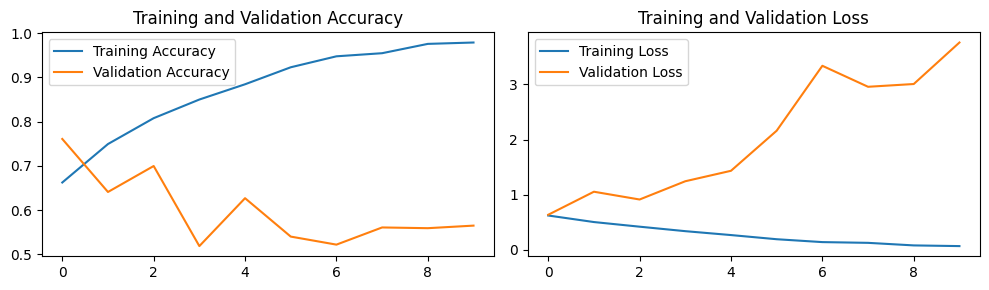

In [ ]:
def plot_history_results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = list(range(epochs))

  plt.figure(figsize=(10, 3))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='best')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='best')
  plt.title('Training and Validation Loss')

  plt.tight_layout()
  plt.show()

plot_history_results(history)

Since training accuracy increased with time up to very high percentages, and validation accuracy converged to about 50%-60%, there might be overfitting.

To deal with overfitting, we can use techniques such as Dropout and data augmentation.

Data augmentation will try to increase the dataset and promote greater generalization, whereas dropout will drop random nodes of the neural net (setting the activation to zero), introducing regularization.

# Data augmentation

A range of transformations can be applied to a image, in order to generate new images, for example:
- flipping, 
- rotating
- zooming

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
# given 1 image, lets show the augmented images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1): # selecting 1 image
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


# Dropout

As mentioned earlier, we will apply dropout regularization to reduce overfitting.

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

# Re-training the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# epochs = 15
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
152/152 [==============================] - 284s 2s/step - loss: 0.6007 - accuracy: 0.6821 - val_loss: 1.3560 - val_accuracy: 0.2258
Epoch 2/10
152/152 [==============================] - 231s 2s/step - loss: 0.5688 - accuracy: 0.7069 - val_loss: 0.7483 - val_accuracy: 0.5897
Epoch 3/10
152/152 [==============================] - 231s 2s/step - loss: 0.5426 - accuracy: 0.7245 - val_loss: 1.0148 - val_accuracy: 0.5302
Epoch 4/10
152/152 [==============================] - 238s 2s/step - loss: 0.5269 - accuracy: 0.7342 - val_loss: 1.1569 - val_accuracy: 0.4442
Epoch 5/10
152/152 [==============================] - 235s 2s/step - loss: 0.5148 - accuracy: 0.7493 - val_loss: 0.8679 - val_accuracy: 0.5955
Epoch 6/10
152/152 [==============================] - 226s 1s/step - loss: 0.5085 - accuracy: 0.7431 - val_loss: 0.6375 - val_accuracy: 0.7138
Epoch 7/10
152/152 [==============================] - 232s 2s/step - loss: 0.4933 - accuracy: 0.7584 - val_loss: 1.2653 - val_accuracy: 0.5029

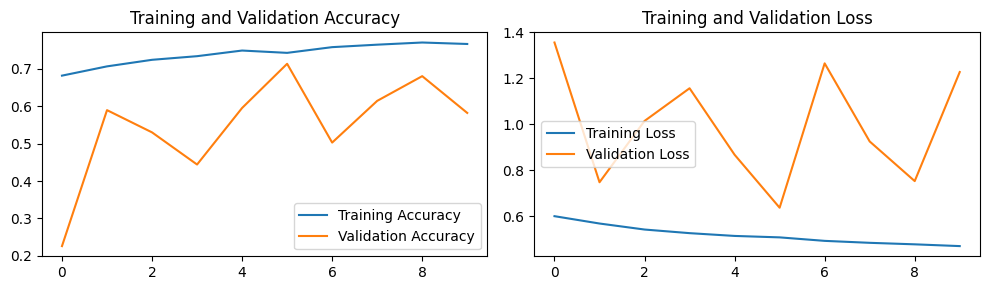

In [ ]:
def plot_history_results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = list(range(epochs))

  plt.figure(figsize=(10, 3))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='best')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='best')
  plt.title('Training and Validation Loss')

  plt.tight_layout()
  plt.show()

plot_history_results(history)

Now the training accuracy does not seem to increase so fast and so much, in a relatively fair value, whereas the validation accuracy increases converging to 60%.

In [ ]:
model

# Inference

In [ ]:
os.listdir(os.path.join(root_path, 'image_dataset', 'not st george'))[0]

'img_0.jpg'

In [ ]:
def model_inference(img_path,
                    img_height,
                    img_width,
                    class_names):
  # load image in desired shape
  img = tf.keras.utils.load_img(
      img_path, target_size=(img_height, img_width)
  )
    
  # transform to array
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  # predict
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
      "This image most likely belongs to {} with a {:.3f}% confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

model_inference(img_path = os.path.join(root_path, 'image_dataset', 'not st george', 'img_0.jpg'),
                    img_height=img_height,
                    img_width=img_width,
                    class_names=class_names)

1/1 [==============================] - 0s 38ms/step
This image most likely belongs to not st george with a 95.522% confidence.


In [ ]:
model_inference(img_path = os.path.join(root_path, 'image_dataset', 'st george', 'img_0.jpg'),
                    img_height=img_height,
                    img_width=img_width,
                    class_names=class_names)

1/1 [==============================] - 0s 36ms/step
This image most likely belongs to st george with a 67.036% confidence.


# Saving the model

In [ ]:
def convert_model(model):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    return tflite_model

def save_model(model, out_dir):
    with open(os.path.join(out_dir, 'model.tflite'), 'wb') as f:
        f.write(model)

tflite_model = convert_model(model)
save_model(model = tflite_model,
            out_dir = root_path)

os.listdir(root_path)

['test_assignment_cv', 'image_dataset', 'model.tflite']

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
